In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertisement.csv', index_col=[0])
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# checking for outlliers

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['radio'], ax = axs[1])
plt3 = sns.boxplot(df['newspaper'], ax = axs[2])
plt.tight_layout()

# EDA

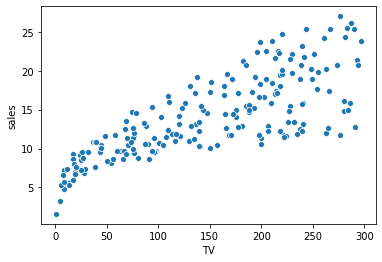

In [8]:

# Let's see how Sales are related with other variables using scatter plot.

sns.scatterplot(x='TV', y='sales', data=df)

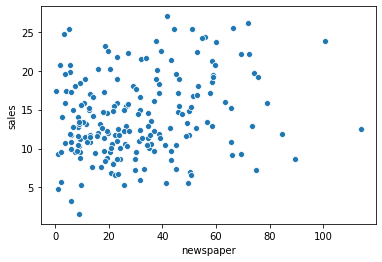

In [9]:

sns.scatterplot(x='newspaper', y='sales', data=df)

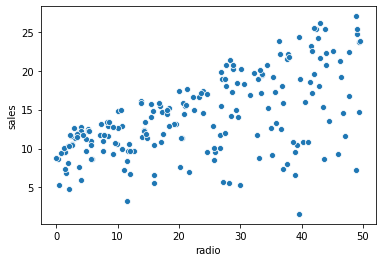

In [10]:
sns.scatterplot(x='radio', y='sales', data=df)

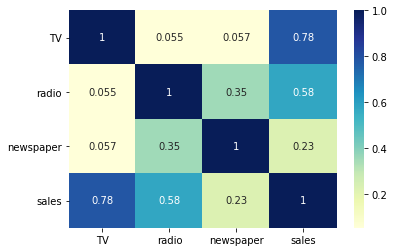

In [11]:
# let's see the correlation between different variable

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

<Figure size 1440x360 with 0 Axes>

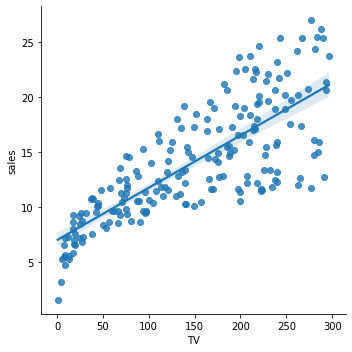

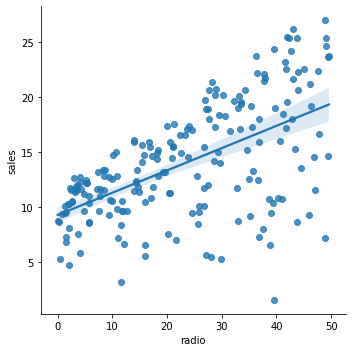

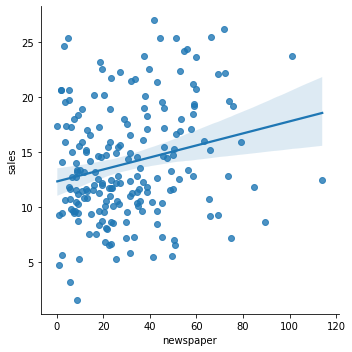

In [12]:
#This is a linear model plot.

plt.figure(figsize=(20, 5))
sns.lmplot(data=df, x='TV', y='sales', fit_reg=True)
sns.lmplot(data=df, x='radio', y='sales', fit_reg=True)
sns.lmplot(data=df, x='newspaper', y='sales', fit_reg=True)

# Model Building

In [13]:

x = df.drop('sales', axis=1)
y = df['sales']

In [14]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69)

In [15]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor

[0.04579596 0.18045523 0.00108996]


Text(0, 0.5, 'Predicted Values')

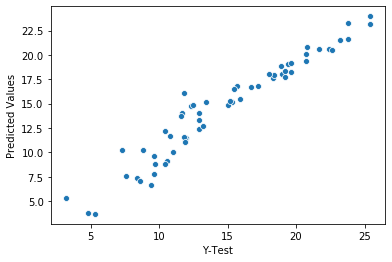

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_)
predlr = lr.predict(x_test)
sns.scatterplot(y_test, predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

[0.04579593 0.18044804 0.00109177]


Text(0, 0.5, 'Predicted Values')

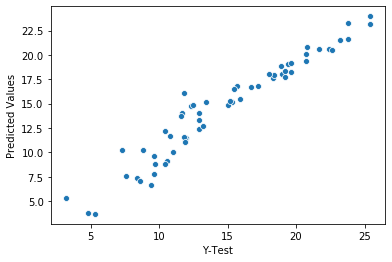

In [18]:
r = Ridge()
r.fit(x_train, y_train)
print(r.coef_)
predr = r.predict(x_test)
sns.scatterplot(y_test, predr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predcited Values')

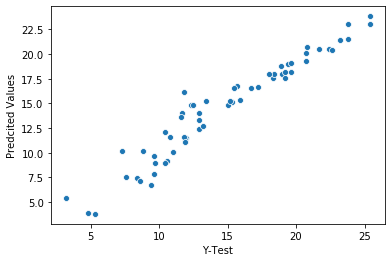

In [20]:
l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
sns.scatterplot(y_test, predl)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predcited Values')

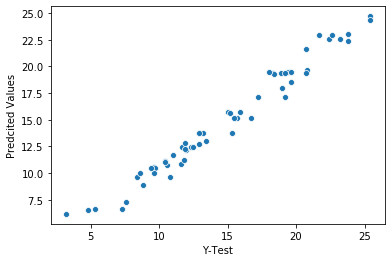

In [21]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
predada = ada.predict(x_test)
sns.scatterplot(y_test, predada)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

# Metrics Evaluation

In [22]:
import sklearn.metrics as metrics

In [23]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predlr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predlr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predlr))))

MAE: 1.146512690227964
MSE: 2.078569872417909
RMSE: 1.441724617400254


In [24]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predr)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predr)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predr))))

MAE: 1.1465412561816883
MSE: 2.078646334941802
RMSE: 1.441751134884867


In [29]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predl)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predl)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predl))))

MAE: 1.166758244639265
MSE: 2.1287515684273925
RMSE: 1.459024183633497


In [27]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predada)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predada)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predada))))

MAE: 0.7898787413775732
MSE: 0.9297269487762738
RMSE: 0.9642234952417794


# Checking cross validation score

In [30]:

from sklearn.model_selection import cross_val_score

In [31]:
# cross validation score for linear regression

scores = cross_val_score(lr, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())


Scores:  [ -2.2072615   -3.23976887  -1.95099514  -2.01101796 -11.95925719
  -2.91553405  -1.71565255  -2.97886423  -2.93379946  -2.10072017]
Mean:  -3.4012871108426617


In [32]:
# cross validation score for Ridge regression

scores = cross_val_score(r, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [ -2.2073032   -3.23973725  -1.95099732  -2.01094743 -11.95879604
  -2.91556491  -1.71582036  -2.97882606  -2.9338462   -2.10080782]
Mean:  -3.4012646577026784


In [33]:
# cross validation score for lasso regression

scores = cross_val_score(l, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [ -2.22805451  -3.18351496  -1.96409228  -1.94251365 -11.69364199
  -2.93663143  -1.74848563  -2.94656687  -2.89204736  -2.14028906]
Mean:  -3.367583773465108


In [35]:
# cross validation score for ada boost regressor

scores = cross_val_score(ada, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
    
print("Scores: ", scores)
print("Mean: ", scores.mean())

Scores:  [-0.74115906 -2.1286914  -0.8864679  -0.64002815 -3.27608705 -1.81797971
 -1.33066414 -1.00962899 -2.27883384 -1.77321606]
Mean:  -1.588275631614809
